In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_for_ml_v4.csv')
df.isna().sum()

date                  0
time                  0
timestamp             0
date_of_week          0
hour                  0
quarter_of_year       0
month                 0
day_of_year           0
day_of_month          0
week_of_year          0
is_lunch_break        0
is_class_time         0
is_weekday            0
is_Thai_holiday       0
is_exam_period        0
academic_calendar     0
weather_condition    14
temperature          14
humidity             14
wind_speed           14
pressure             14
count_1204            0
count_0412            0
count_1211            0
dtype: int64

In [0]:
df['weather_condition'].fillna(df['weather_condition'].mode().iloc[0], inplace=True)

In [0]:
is_lunch_break = pd.get_dummies(df['is_lunch_break'], prefix='lunchbreak', drop_first=True)
is_class_time = pd.get_dummies(df['is_class_time'], prefix='classtime', drop_first=True)
is_weekday = pd.get_dummies(df['is_weekday'], drop_first=True)
is_Thai_holiday = pd.get_dummies(df['is_Thai_holiday'], prefix='holiday', drop_first=True)
is_exam_period = pd.get_dummies(df['is_exam_period'], prefix='exam', drop_first=True)
academic_calendar = pd.get_dummies(df['academic_calendar'], drop_first=True)
weather_condition = pd.get_dummies(df['weather_condition'], drop_first=True)

df.drop(['is_lunch_break', 'is_class_time', 'is_weekday', 'is_Thai_holiday', 'is_exam_period', 'academic_calendar', 'weather_condition'], axis=1, inplace=True)
df = pd.concat([df, is_lunch_break, is_class_time, is_weekday, is_Thai_holiday, is_exam_period, academic_calendar, weather_condition], axis=1)

In [5]:
df

,date,time,timestamp,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,temperature,humidity,wind_speed,pressure,count_1204,count_0412,count_1211,lunchbreak_YES,classtime_YES,WEEKEND,holiday_NORMAL,exam_NORMAL,2018/SUMMER,2019/1,HOLIDAY,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Heavy T-Storm / Windy,Light Rain,Light Rain Shower,Light Rain Shower / Windy,Light Rain with Thunder,Mostly Cloudy,Mostly Cloudy / Windy,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Rain Shower,Showers in the Vicinity,T-Storm,T-Storm / Windy,Thunder,Thunder in the Vicinity
0,2019-01-01,07:00,2019-01-01 07:00,3,7,1,1,1,1,1,21.0,0.73,6.0,30.05,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-01-01,08:00,2019-01-01 08:00,3,8,1,1,1,1,1,21.0,0.73,8.0,30.08,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-01-01,09:00,2019-01-01 09:00,3,9,1,1,1,1,1,23.0,0.69,7.0,30.08,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-01,10:00,2019-01-01 10:00,3,10,1,1,1,1,1,24.0,0.65,6.0,30.08,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-01-01,11:00,2019-01-01 11:00,3,11,1,1,1,1,1,26.0,0.57,0.0,30.08,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,2019-09-30,15:00,2019-09-30 15:00,2,15,3,9,273,30,40,34.0,0.59,6.0,29.73,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3818,2019-09-30,17:00,2019-09-30 17:00,2,17,3,9,273,30,40,32.0,0.66,7.0,29.73,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3819,2019-09-30,18:00,2019-09-30 18:00,2,18,3,9,273,30,40,29.0,0.84,3.0,29.76,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3820,2019-09-30,19:00,2019-09-30 19:00,2,19,3,9,273,30,40,28.0,0.84,20.0,29.79,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.dtypes

date                          object
time                          object
timestamp                     object
date_of_week                   int64
hour                           int64
quarter_of_year                int64
month                          int64
day_of_year                    int64
day_of_month                   int64
week_of_year                   int64
temperature                  float64
humidity                     float64
wind_speed                   float64
pressure                     float64
count_1204                     int64
count_0412                     int64
count_1211                     int64
lunchbreak_YES                 uint8
classtime_YES                  uint8
WEEKEND                        uint8
holiday_NORMAL                 uint8
exam_NORMAL                    uint8
2018/SUMMER                    uint8
2019/1                         uint8
HOLIDAY                        uint8
Fair                           uint8
Fair / Windy                   uint8
F

In [7]:
train_prophet = df.iloc[:3612]

X_train = df.iloc[:3612]
X_train_na = X_train[['temperature', 'humidity', 'wind_speed', 'pressure']]
X_train.drop(['date', 'time', 'temperature', 'humidity', 'wind_speed', 'pressure'], axis=1, inplace=True)
X_train.isna().sum()

timestamp                    0
date_of_week                 0
hour                         0
quarter_of_year              0
month                        0
day_of_year                  0
day_of_month                 0
week_of_year                 0
count_1204                   0
count_0412                   0
count_1211                   0
lunchbreak_YES               0
classtime_YES                0
WEEKEND                      0
holiday_NORMAL               0
exam_NORMAL                  0
2018/SUMMER                  0
2019/1                       0
HOLIDAY                      0
Fair                         0
Fair / Windy                 0
Fog                          0
Haze                         0
Heavy Rain                   0
Heavy Rain / Windy           0
Heavy T-Storm                0
Heavy T-Storm / Windy        0
Light Rain                   0
Light Rain Shower            0
Light Rain Shower / Windy    0
Light Rain with Thunder      0
Mostly Cloudy                0
Mostly C

In [8]:
test_prophet = df.iloc[3612:]

X_test = df.iloc[3612:]
X_test_na = X_test[['temperature', 'humidity', 'wind_speed', 'pressure']]
X_test.drop(['date', 'time', 'temperature', 'humidity', 'wind_speed', 'pressure'], axis=1, inplace=True)
X_test.isna().sum()

timestamp                    0
date_of_week                 0
hour                         0
quarter_of_year              0
month                        0
day_of_year                  0
day_of_month                 0
week_of_year                 0
count_1204                   0
count_0412                   0
count_1211                   0
lunchbreak_YES               0
classtime_YES                0
WEEKEND                      0
holiday_NORMAL               0
exam_NORMAL                  0
2018/SUMMER                  0
2019/1                       0
HOLIDAY                      0
Fair                         0
Fair / Windy                 0
Fog                          0
Haze                         0
Heavy Rain                   0
Heavy Rain / Windy           0
Heavy T-Storm                0
Heavy T-Storm / Windy        0
Light Rain                   0
Light Rain Shower            0
Light Rain Shower / Windy    0
Light Rain with Thunder      0
Mostly Cloudy                0
Mostly C

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train_na.fillna(X_train_na.mean(), inplace=True)
X_test_na.fillna(X_test_na.mean(), inplace=True)

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_na = pd.DataFrame(scaler.fit_transform(X_train_na), columns=X_train_na.columns)
X_test_na = pd.DataFrame(scaler.fit_transform(X_test_na), columns=X_test_na.columns)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
X_train_na

,temperature,humidity,wind_speed,pressure
0,0.000000,0.674699,0.200000,0.946429
1,0.000000,0.674699,0.266667,1.000000
2,0.105263,0.626506,0.233333,1.000000
3,0.157895,0.578313,0.200000,1.000000
4,0.263158,0.481928,0.000000,1.000000
...,...,...,...,...
3607,0.684211,0.421687,0.300000,0.214286
3608,0.684211,0.421687,0.266667,0.214286
3609,0.526316,0.698795,0.333333,0.267857
3610,0.473684,0.746988,0.333333,0.267857


In [0]:
X_train = pd.concat([X_train, X_train_na], axis=1)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, X_test_na], axis=1)

X_train_clone = X_train
X_test_clone = X_test

X_train.rename(columns = {'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)
X_test.rename(columns = {'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)

In [0]:
# train_prophet = df.iloc[:3612]
# train_prophet.rename(columns={'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)
# train_prophet

In [0]:
# test_prophet = df.iloc[3612:]
# test_prophet.rename(columns={'timestamp': 'ds', 'count_1204': 'y'}, inplace=True)
# test_prophet

In [11]:
for_future = pd.concat([X_train, X_test])
# for_future.drop(['date', 'time'], axis=1, inplace=True)
for_future.reset_index(drop=True, inplace=True)
for_future.isna().sum()

ds                           0
date_of_week                 0
hour                         0
quarter_of_year              0
month                        0
day_of_year                  0
day_of_month                 0
week_of_year                 0
y                            0
count_0412                   0
count_1211                   0
lunchbreak_YES               0
classtime_YES                0
WEEKEND                      0
holiday_NORMAL               0
exam_NORMAL                  0
2018/SUMMER                  0
2019/1                       0
HOLIDAY                      0
Fair                         0
Fair / Windy                 0
Fog                          0
Haze                         0
Heavy Rain                   0
Heavy Rain / Windy           0
Heavy T-Storm                0
Heavy T-Storm / Windy        0
Light Rain                   0
Light Rain Shower            0
Light Rain Shower / Windy    0
Light Rain with Thunder      0
Mostly Cloudy                0
Mostly C

In [12]:
train_plot = train_prophet[['date', 'count_1204']]
train_plot['date'] = pd.to_datetime(train_plot['date'], dayfirst=True)
train_plot = train_plot.groupby(['date']).sum()
train_plot

,count_1204
date,
2019-01-01,0
2019-01-02,0
2019-01-03,0
2019-01-04,0
2019-01-05,0
...,...
2019-09-11,8
2019-09-12,1
2019-09-13,8


In [13]:
test_plot = test_prophet[['date', 'count_1204']]
test_plot['date'] = pd.to_datetime(test_plot['date'], dayfirst=True)
test_plot = test_plot.groupby(['date']).sum()
test_plot

,count_1204
date,
2019-09-16,5
2019-09-17,4
2019-09-18,5
2019-09-19,7
2019-09-20,7
2019-09-21,0
2019-09-22,0
2019-09-23,7
2019-09-24,2


In [0]:
# plt.figure(figsize=(12,6))
# plt.plot(train_plot)
# plt.plot(test_plot)

In [15]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

X_train['cap'] = 6
X_train['floor'] = 0
m = Prophet(growth='logistic', changepoint_prior_scale=0.1)
m = Prophet(changepoint_prior_scale=0.05)
m.add_regressor('date_of_week')
m.add_regressor('hour')
m.add_regressor('quarter_of_year')
m.add_regressor('month')
m.add_regressor('day_of_year')
m.add_regressor('day_of_month')
m.add_regressor('week_of_year')
m.add_regressor('lunchbreak_YES')
m.add_regressor('classtime_YES')
m.add_regressor('WEEKEND')
m.add_regressor('holiday_NORMAL')
m.add_regressor('exam_NORMAL')
m.add_regressor('temperature')
m.add_regressor('humidity')
m.add_regressor('wind_speed')
m.add_regressor('pressure')
# m.add_regressor('2018/2')
m.add_regressor('2018/SUMMER')
m.add_regressor('2019/1')
m.add_regressor('HOLIDAY')
# m.add_regressor('Cloudy')
m.add_regressor('Fair')
m.add_regressor('Fair / Windy')
m.add_regressor('Fog')
m.add_regressor('Haze')
m.add_regressor('Heavy Rain')
m.add_regressor('Heavy Rain / Windy')
m.add_regressor('Heavy T-Storm')
m.add_regressor('Heavy T-Storm / Windy')
m.add_regressor('Light Rain')
m.add_regressor('Light Rain Shower')
m.add_regressor('Light Rain Shower / Windy')
m.add_regressor('Light Rain with Thunder')
m.add_regressor('Mostly Cloudy')
m.add_regressor('Mostly Cloudy / Windy')
m.add_regressor('Partly Cloudy')
m.add_regressor('Partly Cloudy / Windy')
m.add_regressor('Rain')
m.add_regressor('Rain / Windy')
m.add_regressor('Rain Shower')
m.add_regressor('Showers in the Vicinity')
m.add_regressor('T-Storm')
m.add_regressor('T-Storm / Windy')
m.add_regressor('Thunder')
m.add_regressor('Thunder in the Vicinity')
m.fit(X_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=360, freq='H')
future['cap'] = 6
future['floor'] = 0
future = future[(future['ds'].dt.hour >= 7) & (future['ds'].dt.hour < 21)]
# future = future[future['ds'].dt.dayofweek < 5]
future.reset_index(drop=True, inplace=True)
future['date_of_week'] = for_future['date_of_week']
future['hour'] = for_future['hour']
future['quarter_of_year'] = for_future['quarter_of_year']
future['month'] = for_future['month']
future['day_of_year'] = for_future['day_of_year']
future['day_of_month'] = for_future['day_of_month']
future['week_of_year'] = for_future['week_of_year']
future['lunchbreak_YES'] = for_future['lunchbreak_YES']
future['classtime_YES'] = for_future['classtime_YES']
future['WEEKEND'] = for_future['WEEKEND']
future['holiday_NORMAL'] = for_future['holiday_NORMAL']
future['exam_NORMAL'] = for_future['exam_NORMAL']
future['temperature'] = for_future['temperature']
future['humidity'] = for_future['humidity']
future['wind_speed'] = for_future['wind_speed']
future['pressure'] = for_future['pressure']
# future['2018/2'] = for_future['2018/2']
future['2018/SUMMER'] = for_future['2018/SUMMER']
future['2019/1'] = for_future['2019/1']
future['HOLIDAY'] = for_future['HOLIDAY']
# future['Cloudy'] = for_future['Cloudy']
future['Fair'] = for_future['Fair']
future['Fair / Windy'] = for_future['Fair / Windy']
future['Fog'] = for_future['Fog']
future['Haze'] = for_future['Haze']
future['Heavy Rain'] = for_future['Heavy Rain']
future['Heavy Rain / Windy'] = for_future['Heavy Rain / Windy']
future['Heavy T-Storm'] = for_future['Heavy T-Storm']
future['Heavy T-Storm / Windy'] = for_future['Heavy T-Storm / Windy']
future['Light Rain'] = for_future['Light Rain']
future['Light Rain Shower'] = for_future['Light Rain Shower']
future['Light Rain Shower / Windy'] = for_future['Light Rain Shower / Windy']
future['Light Rain with Thunder'] = for_future['Light Rain with Thunder']
future['Mostly Cloudy'] = for_future['Mostly Cloudy']
future['Mostly Cloudy / Windy'] = for_future['Mostly Cloudy / Windy']
future['Partly Cloudy'] = for_future['Partly Cloudy']
future['Partly Cloudy / Windy'] = for_future['Partly Cloudy / Windy']
future['Rain'] = for_future['Rain']
future['Rain / Windy'] = for_future['Rain / Windy']
future['Rain Shower'] = for_future['Rain Shower']
future['Showers in the Vicinity'] = for_future['Showers in the Vicinity']
future['T-Storm'] = for_future['T-Storm']
future['T-Storm / Windy'] = for_future['T-Storm / Windy']
future['Thunder'] = for_future['Thunder']
future['Thunder in the Vicinity'] = for_future['Thunder in the Vicinity']

forecast = m.predict(future)
yhat_round = []
for each in forecast['yhat_upper']:
#     if ((each*10)%10 >= 6):
#         each = math.ceil(each)
#     else:
#         each = math.floor(each)
        
    if(each < 0):
        each = 0
    elif ((each*10)%10 >= 8):
        each = math.ceil(each)
    else:
        each = math.floor(each)

#     each = math.ceil(each)
    yhat_round.append(each)
forecast['yhat'] = yhat_round
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01 07:00:00,0,-0.323587,0.662472
1,2019-01-01 08:00:00,1,-0.003921,1.028869
2,2019-01-01 09:00:00,1,-0.145743,0.912937
3,2019-01-01 10:00:00,0,-0.304133,0.695650
4,2019-01-01 11:00:00,0,-0.414367,0.625053
...,...,...,...,...
3817,2019-09-30 16:00:00,0,-0.628687,0.362106
3818,2019-09-30 17:00:00,0,-0.599918,0.399589
3819,2019-09-30 18:00:00,0,-0.452695,0.580123
3820,2019-09-30 19:00:00,0,-0.506549,0.543819


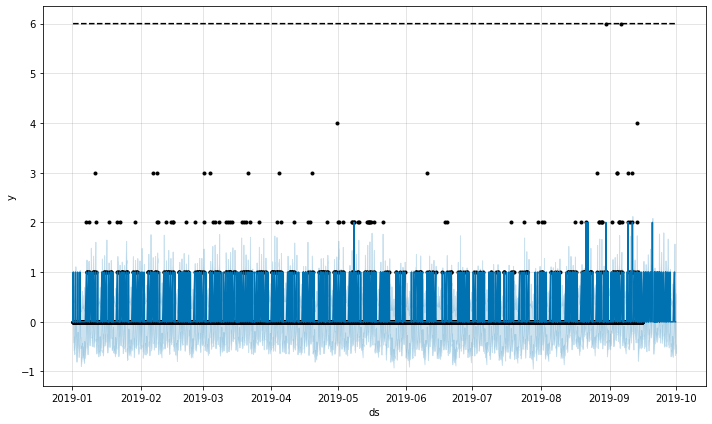

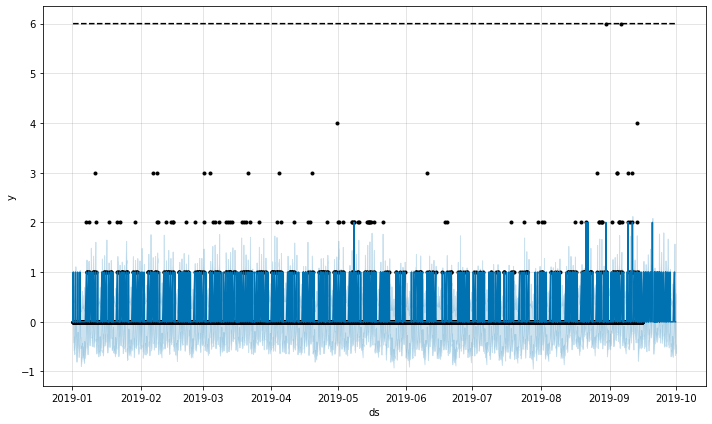

In [17]:
m.plot(forecast)

In [18]:
forecast_result = forecast[['ds', 'yhat']]
forecast_result.reset_index(drop=True, inplace=True)
forecast_result

,ds,yhat
0,2019-01-01 07:00:00,0
1,2019-01-01 08:00:00,1
2,2019-01-01 09:00:00,1
3,2019-01-01 10:00:00,0
4,2019-01-01 11:00:00,0
...,...,...
3817,2019-09-30 16:00:00,0
3818,2019-09-30 17:00:00,0
3819,2019-09-30 18:00:00,0
3820,2019-09-30 19:00:00,0


In [0]:
def extract_date(df):
    each_date = []
    
    for ts in df['ds']:
        ts = str(ts)
        date = ts[0:10]
        each_date.append(date)
    
    df['date'] = each_date
    
    return df

In [20]:
forecast_fit = forecast_result.iloc[:len(X_train)]
forecast_fit = extract_date(forecast_fit)
forecast_fit['date'] = pd.to_datetime(forecast_fit['date'], dayfirst=True)
forecast_fit = forecast_fit.groupby(['date']).sum()
forecast_fit

,yhat
date,
2019-01-01,2
2019-01-02,2
2019-01-03,2
2019-01-04,2
2019-01-05,0
...,...
2019-09-11,8
2019-09-12,6
2019-09-13,6


In [21]:
forecast_test = forecast_result.iloc[len(X_train):]
forecast_test = extract_date(forecast_test)
forecast_test['date'] = pd.to_datetime(forecast_test['date'], dayfirst=True)
forecast_test = forecast_test.groupby(['date']).sum()
forecast_test

,yhat
date,
2019-09-16,5
2019-09-17,5
2019-09-18,5
2019-09-19,8
2019-09-20,8
2019-09-21,4
2019-09-22,3
2019-09-23,6
2019-09-24,6


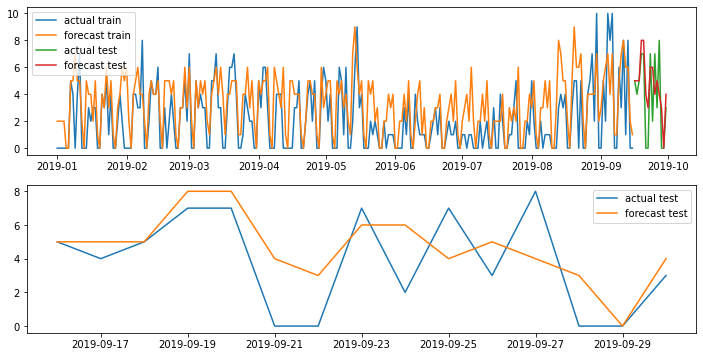

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(train_plot, label='actual train')
plt.plot(forecast_fit, label='forecast train')
plt.plot(test_plot, label='actual test')
plt.plot(forecast_test, label='forecast test')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(test_plot, label='actual test')
plt.plot(forecast_test, label='forecast test')
plt.legend(loc='best')
plt.show()

In [0]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def join_eva(train, forecast):
    forecast = forecast[:len(train)]
    
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))

def cal_metrics(df):
    print(df)
    r2 = r2_score(df['y'], df['yhat'])
    rmse = np.sqrt(mean_squared_error(df['y'], df['yhat']))
    mae = mean_absolute_error(df['y'], df['yhat'])
    
    return np.round(r2,4), np.round(rmse, 4), np.round(mae, 4)

def join_test(test, forecast):
    forecast = forecast[-len(test):]
    
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(test.set_index('ds'))

In [24]:
train_result = join_eva(X_train, forecast)
print(cal_metrics(train_result))

                     yhat  yhat_lower  yhat_upper  ...  pressure  cap  floor
ds                                                 ...                      
2019-01-01 07:00:00     0   -0.323587    0.662472  ...  0.946429    6      0
2019-01-01 08:00:00     1   -0.003921    1.028869  ...  1.000000    6      0
2019-01-01 09:00:00     1   -0.145743    0.912937  ...  1.000000    6      0
2019-01-01 10:00:00     0   -0.304133    0.695650  ...  1.000000    6      0
2019-01-01 11:00:00     0   -0.414367    0.625053  ...  1.000000    6      0
...                   ...         ...         ...  ...       ...  ...    ...
2019-09-15 16:00:00     0   -0.481683    0.566135  ...  0.214286    6      0
2019-09-15 17:00:00     0   -0.446904    0.557851  ...  0.214286    6      0
2019-09-15 18:00:00     0   -0.329055    0.718914  ...  0.267857    6      0
2019-09-15 19:00:00     0   -0.326590    0.680441  ...  0.267857    6      0
2019-09-15 20:00:00     0   -0.346597    0.747672  ...  0.321429    6      0

In [25]:
test_result = join_test(X_test, forecast)
print(cal_metrics(test_result))

                     yhat  yhat_lower  ...  wind_speed  pressure
ds                                     ...                      
2019-09-16 07:00:00     1   -0.039614  ...    0.000000  0.342857
2019-09-16 08:00:00     1    0.222774  ...    0.095238  0.342857
2019-09-16 09:00:00     1    0.136337  ...    0.000000  0.428571
2019-09-16 10:00:00     1   -0.177548  ...    0.000000  0.428571
2019-09-16 11:00:00     0   -0.283717  ...    0.333333  0.342857
...                   ...         ...  ...         ...       ...
2019-09-30 16:00:00     0   -0.628687  ...    0.142857  0.657143
2019-09-30 17:00:00     0   -0.599918  ...    0.333333  0.257143
2019-09-30 18:00:00     0   -0.452695  ...    0.142857  0.342857
2019-09-30 19:00:00     0   -0.506549  ...    0.952381  0.428571
2019-09-30 20:00:00     0   -0.630801  ...    0.142857  0.485714

[210 rows x 49 columns]
(0.022, 0.6473, 0.3524)


In [0]:
train (logistics 0-6)
all features no round (0.1853, 0.4196, 0.2473)

pure no round (0.1886, 0.4188, 0.2505)
pure round at 5 (0.0714, 0.4480, 0.1498)
pure round at 6 (0.0586, 0.4511, 0.1426)

all features no round (0.1853, 0.4196, 0.2473)
all features round at 5 (0.0894, 0.4437, 0.1542)
all features round at 6 (0.0970, 0.4418, 0.1459)

In [0]:
test
all features no round (0.2503, 0.5668, 0.3592)

pure no round (0.1806, 0.5925, 0.4352)
pure round at 5 (0.0887, 0.6249, 0.2762)
pure round at 6 (0.0998, 0.6211, 0.2619)


all features round at 5 (0.1665, 0.5976, 0.2714)
all features round at 6 (0.1665, 0.5976, 0.2429)

In [0]:
from sklearn.model_selection import TimeSeriesSplit
result=[]
size=[]
i=0
tscv = TimeSeriesSplit()
for tr_index, val_index in tscv.split(X_train):
    print("TRAIN:", tr_index, "TEST:", val_index)
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
#     y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    
    X_tr['cap'] = 4
    X_tr['floor'] = 0
    m = Prophet(growth='logistic', changepoint_prior_scale=0.1)
    m = Prophet(changepoint_prior_scale=0.05)
#     m.add_regressor('date_of_week')
#     m.add_regressor('hour')
#     m.add_regressor('quarter_of_year')
#     m.add_regressor('month')
#     m.add_regressor('day_of_year')
#     m.add_regressor('day_of_month')
#     m.add_regressor('week_of_year')
#     m.add_regressor('is_lunch_break')
#     m.add_regressor('is_class_time')
#     m.add_regressor('temperature_normalized')
#     m.add_regressor('humidity_normalized')
#     m.add_regressor('wind_speed_normalized')
#     m.add_regressor('pressure_normalized')
#     m.add_regressor('2018/SUMMER')
#     m.add_regressor('2019/1')
#     m.add_regressor('HOLIDAY')
#     m.add_regressor('Fair')
#     m.add_regressor('Fair / Windy')
#     m.add_regressor('Fog')
#     m.add_regressor('Haze')
#     m.add_regressor('Heavy Rain')
#     m.add_regressor('Heavy Rain / Windy')
#     m.add_regressor('Heavy T-Storm')
#     m.add_regressor('Heavy T-Storm / Windy')
#     m.add_regressor('Light Rain')
#     m.add_regressor('Light Rain Shower')
#     m.add_regressor('Light Rain Shower / Windy')
#     m.add_regressor('Light Rain with Thunder')
#     m.add_regressor('Mostly Cloudy')
#     m.add_regressor('Mostly Cloudy / Windy')
#     m.add_regressor('Partly Cloudy')
#     m.add_regressor('Partly Cloudy / Windy')
#     m.add_regressor('Rain')
#     m.add_regressor('Rain / Windy')
#     m.add_regressor('Rain Shower')
#     m.add_regressor('Showers in the Vicinity')
#     m.add_regressor('T-Storm')
#     m.add_regressor('T-Storm / Windy')
#     m.add_regressor('Thunder')
#     m.add_regressor('Thunder in the Vicinity')
    m.fit(X_tr)
    
    future = m.make_future_dataframe(periods=size[i], freq='H')
    i += 1
    future['cap'] = 4
    future['floor'] = 0
    future = future[(future['ds'].dt.hour >= 7) & (future['ds'].dt.hour < 21)]
#     future = future[future['ds'].dt.dayofweek < 5]
    future.reset_index(drop=True, inplace=True)
#     future['date_of_week'] = X_val['date_of_week']
#     future['hour'] = X_val['hour']
#     future['quarter_of_year'] = X_val['quarter_of_year']
#     future['month'] = X_val['month']
#     future['day_of_year'] = X_val['day_of_year']
#     future['day_of_month'] = X_val['day_of_month']
#     future['week_of_year'] = X_val['week_of_year']
#     future['is_lunch_break'] = X_val['is_lunch_break']
#     future['is_class_time'] = X_val['is_class_time']
#     future['temperature_normalized'] = X_val['temperature_normalized']
#     future['humidity_normalized'] = X_val['humidity_normalized']
#     future['wind_speed_normalized'] = X_val['wind_speed_normalized']
#     future['pressure_normalized'] = X_val['pressure_normalized']
#     future['2018/SUMMER'] = X_val['2018/SUMMER']
#     future['2019/1'] = X_val['2019/1']
#     future['HOLIDAY'] = X_val['HOLIDAY']
#     future['Fair'] = X_val['Fair']
#     future['Fair / Windy'] = X_val['Fair / Windy']
#     future['Fog'] = X_val['Fog']
#     future['Haze'] = X_val['Haze']
#     future['Heavy Rain'] = X_val['Heavy Rain']
#     future['Heavy Rain / Windy'] = X_val['Heavy Rain / Windy']
#     future['Heavy T-Storm'] = X_val['Heavy T-Storm']
#     future['Heavy T-Storm / Windy'] = X_val['Heavy T-Storm / Windy']
#     future['Light Rain'] = X_val['Light Rain']
#     future['Light Rain Shower'] = X_val['Light Rain Shower']
#     future['Light Rain Shower / Windy'] = X_val['Light Rain Shower / Windy']
#     future['Light Rain with Thunder'] = X_val['Light Rain with Thunder']
#     future['Mostly Cloudy'] = X_val['Mostly Cloudy']
#     future['Mostly Cloudy / Windy'] = X_val['Mostly Cloudy / Windy']
#     future['Partly Cloudy'] = X_val['Partly Cloudy']
#     future['Partly Cloudy / Windy'] = X_val['Partly Cloudy / Windy']
#     future['Rain'] = X_val['Rain']
#     future['Rain / Windy'] = X_val['Rain / Windy']
#     future['Rain Shower'] = X_val['Rain Shower']
#     future['Showers in the Vicinity'] = X_val['Showers in the Vicinity']
#     future['T-Storm'] = X_val['T-Storm']
#     future['T-Storm / Windy'] = X_val['T-Storm / Windy']
#     future['Thunder'] = X_val['Thunder']
#     future['Thunder in the Vicinity'] = X_val['Thunder in the Vicinity']

    forecast = m.predict(future)
    yhat_round = []
    for each in forecast['yhat']:
        if ((each*10)%10 >= 6):
            each = math.ceil(each)
        else:
            each = math.floor(each)
    #     each = math.ceil(each)
        yhat_round.append(each)
    forecast['yhat'] = yhat_round
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    m.plot(forecast)
    train_result = join_eva(X_tr, forecast)
    result.append(cal_metrics(train_result))
    test_result = join_test(X_val, forecast)
    result.append(cal_metrics(test_result))


In [0]:
import itertools
from itertools import product
import statsmodels as sm
import statsmodels.api as sm_api
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from tqdm import tqdm_notebook

In [13]:
endo = X_train_clone[['ds', 'y']]
endo['ds'] = pd.to_datetime(endo['ds'], dayfirst=True)
endo.set_index('ds', inplace=True)
endo

,y
ds,
2019-01-01 07:00:00,0
2019-01-01 08:00:00,0
2019-01-01 09:00:00,0
2019-01-01 10:00:00,0
2019-01-01 11:00:00,0
...,...
2019-09-15 16:00:00,0
2019-09-15 17:00:00,0
2019-09-15 18:00:00,0


In [14]:
exo = X_train_clone.drop(['y', 'count_0412', 'count_1211'],axis=1)
# exo = exo[['ds', 'temperature', 'humidity', 'wind_speed', 'pressure']]
exo['ds'] = pd.to_datetime(exo['ds'], dayfirst=True)
exo.set_index('ds', inplace=True)
exo

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,lunchbreak_YES,classtime_YES,WEEKEND,holiday_NORMAL,exam_NORMAL,2018/SUMMER,2019/1,HOLIDAY,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Heavy T-Storm / Windy,Light Rain,Light Rain Shower,Light Rain Shower / Windy,Light Rain with Thunder,Mostly Cloudy,Mostly Cloudy / Windy,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Rain Shower,Showers in the Vicinity,T-Storm,T-Storm / Windy,Thunder,Thunder in the Vicinity,temperature,humidity,wind_speed,pressure
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,3,7,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.674699,0.200000,0.946429
2019-01-01 08:00:00,3,8,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.674699,0.266667,1.000000
2019-01-01 09:00:00,3,9,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.105263,0.626506,0.233333,1.000000
2019-01-01 10:00:00,3,10,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.157895,0.578313,0.200000,1.000000
2019-01-01 11:00:00,3,11,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.263158,0.481928,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-15 16:00:00,1,16,3,9,258,15,37,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.684211,0.421687,0.300000,0.214286
2019-09-15 17:00:00,1,17,3,9,258,15,37,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.684211,0.421687,0.266667,0.214286
2019-09-15 18:00:00,1,18,3,9,258,15,37,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.526316,0.698795,0.333333,0.267857


In [15]:
exo.dtypes

date_of_week                   int64
hour                           int64
quarter_of_year                int64
month                          int64
day_of_year                    int64
day_of_month                   int64
week_of_year                   int64
lunchbreak_YES                 uint8
classtime_YES                  uint8
WEEKEND                        uint8
holiday_NORMAL                 uint8
exam_NORMAL                    uint8
2018/SUMMER                    uint8
2019/1                         uint8
HOLIDAY                        uint8
Fair                           uint8
Fair / Windy                   uint8
Fog                            uint8
Haze                           uint8
Heavy Rain                     uint8
Heavy Rain / Windy             uint8
Heavy T-Storm                  uint8
Heavy T-Storm / Windy          uint8
Light Rain                     uint8
Light Rain Shower              uint8
Light Rain Shower / Windy      uint8
Light Rain with Thunder        uint8
M

In [16]:
exo_test = X_test_clone.drop(['y', 'count_0412', 'count_1211'],axis=1)
exo_test['ds'] = pd.to_datetime(exo_test['ds'], dayfirst=True)
exo_test.set_index('ds', inplace=True)
exo_test

,date_of_week,hour,quarter_of_year,month,day_of_year,day_of_month,week_of_year,lunchbreak_YES,classtime_YES,WEEKEND,holiday_NORMAL,exam_NORMAL,2018/SUMMER,2019/1,HOLIDAY,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Heavy T-Storm / Windy,Light Rain,Light Rain Shower,Light Rain Shower / Windy,Light Rain with Thunder,Mostly Cloudy,Mostly Cloudy / Windy,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Rain Shower,Showers in the Vicinity,T-Storm,T-Storm / Windy,Thunder,Thunder in the Vicinity,temperature,humidity,wind_speed,pressure
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-16 07:00:00,2,7,3,9,259,16,38,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.813559,0.000000,0.342857
2019-09-16 08:00:00,2,8,3,9,259,16,38,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0.728814,0.095238,0.342857
2019-09-16 09:00:00,2,9,3,9,259,16,38,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0.644068,0.000000,0.428571
2019-09-16 10:00:00,2,10,3,9,259,16,38,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.6,0.491525,0.000000,0.428571
2019-09-16 11:00:00,2,11,3,9,259,16,38,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.6,0.491525,0.333333,0.342857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 15:00:00,2,15,3,9,273,30,40,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.9,0.305085,0.285714,0.257143
2019-09-30 17:00:00,2,17,3,9,273,30,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0.423729,0.333333,0.257143
2019-09-30 18:00:00,2,18,3,9,273,30,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0.728814,0.142857,0.342857


In [0]:
def ts_plot(y, lags=None, figsize=(14,7), style='bmh'):
#     if not isinstance(y, pd.Series):
#         y = pd.Series(y)
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('TSA-DF: p={0:5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
ts_plot(endo, lags=30)

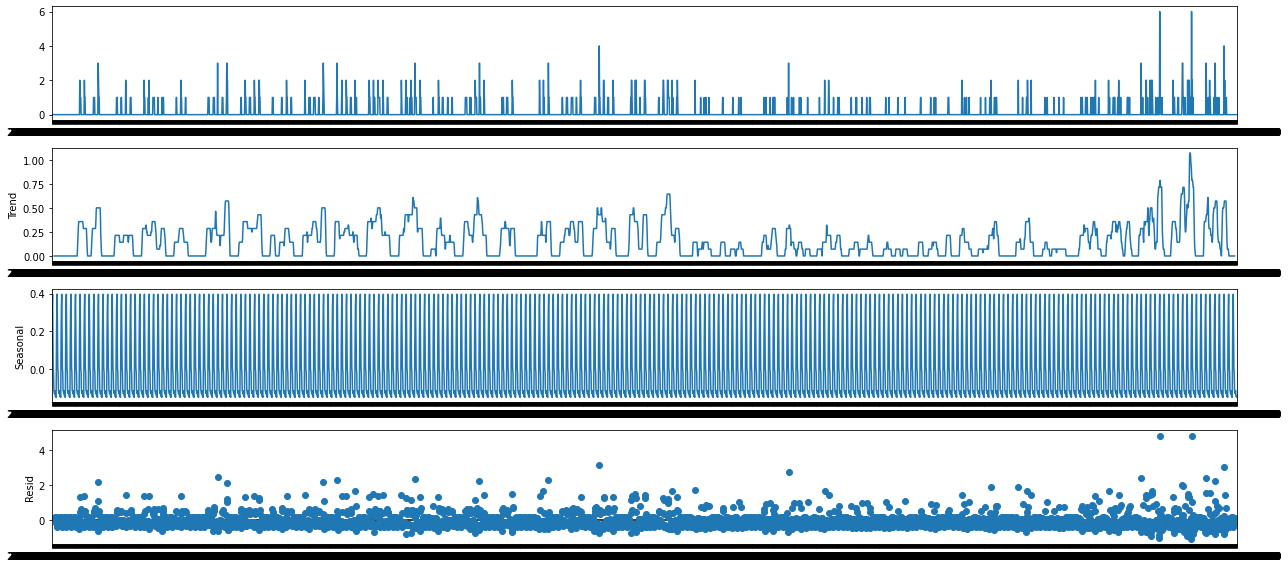

In [0]:
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(endo, freq=14, model='additive')
fig = decomposition.plot()
plt.show()

In [31]:
p = range(0, 3)
d = 0
q = range(0, 3)
s = 14
pdq = []
seasonal_pdq = []
for ar in p:
    for ma in q:
        param = (ar, d, ma)
        sparam = (ar, d, ma, s)
        pdq.append(param)
        seasonal_pdq.append(sparam)

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 14)
SARIMAX: (0, 0, 1) x (0, 0, 2, 14)
SARIMAX: (0, 0, 2) x (1, 0, 0, 14)
SARIMAX: (0, 0, 2) x (1, 0, 1, 14)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm_api.tsa.statespace.SARIMAX(endo, exog=exo order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}14 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [0]:
mod = sm_api.tsa.statespace.SARIMAX(endog=endo, exog=exo,
                                order=(2, 0, 0),
                                seasonal_order=(2, 0, 2, 14),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


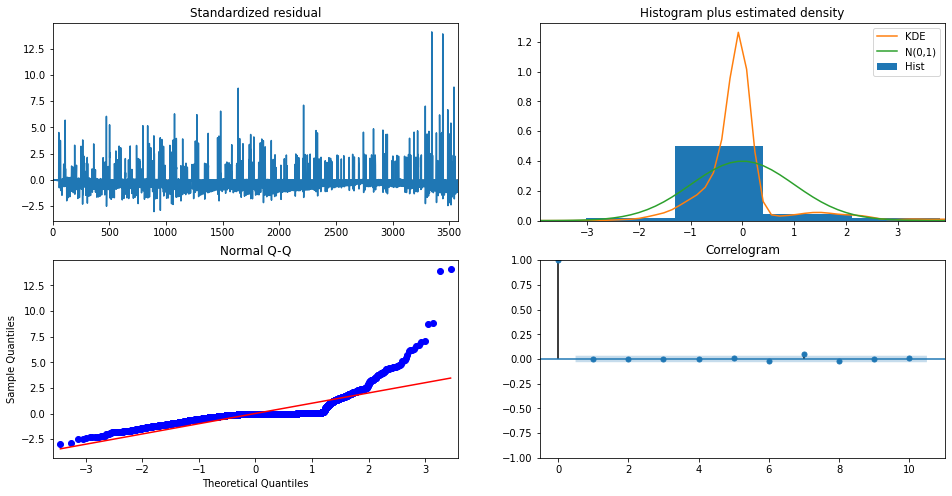

In [55]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

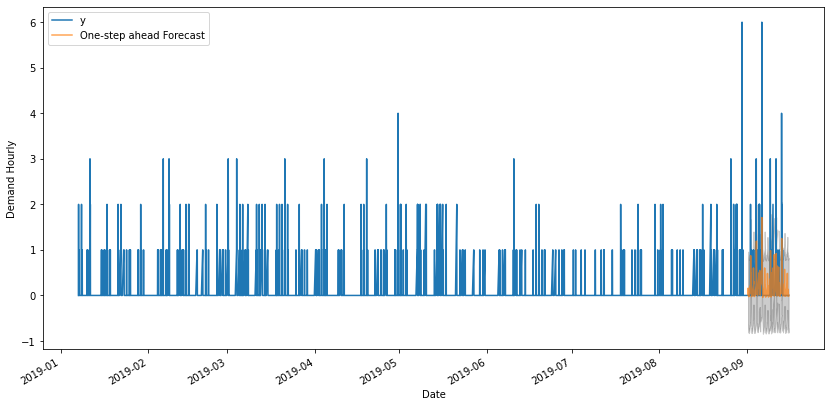

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2019-09-01 11:00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = endo[pd.to_datetime('2019-01-07 07:00:00'):].plot(label='observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [0]:
# pred_uc = results.get_forecast(steps=70, exog=for_future[['Temperature', 'Humidity', 'Windspeed', 'Pressure']])
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()

plt.plot(pred_uc.predicted_mean)
print(pred_uc.predicted_mean, pred_ci.iloc[:, 1])
# ax = train_arima.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Demand Hourly')
# plt.legend()
# plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import pydot

In [0]:
y = df['count_1204']
X = df.drop(['date', 'time', 'timestamp', 'count_1204', 'count_0412', 'count_1211'],axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [0]:
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X, y)

In [0]:
y_predicted = model.predict(X_test)
r2 = r2_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
mae = mean_absolute_error(y_test, y_predicted)

print('R2: ', np.round(r2, 4))
print('RMSE: ', np.round(rmse, 4))
print('MAE: ', np.round(mae, 4))

In [0]:
fi = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fi

In [0]:
tree = model.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [0]:
model.predict(np.array(X.iloc[1]).reshape(1,-1))

In [0]:
all features 
R2:  0.8892
RMSE:  0.1385
MAE:  0.0636
    

In [0]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,15),
            'n_estimators': (10, 50, 100, 1000),},
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=2)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_absolute_error')

    return scores

In [0]:
rfr_model(X_train, y_train)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 2)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [0]:
rf_random.best_params_

In [0]:
def evaluate(model, test_features, test_labels):
    y_predicted = model.predict(test_features)
    r2 = r2_score(y_test, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
    mae = mean_absolute_error(y_test, y_predicted)
    print('R2: ', np.round(r2, 4))
    print('RMSE: ', np.round(rmse, 4))
    print('MAE: ', np.round(mae, 4))
    
    pass

In [0]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [0]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [0]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [0]:
CV_rfc = GridSearchCV(estimator=, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

In [0]:
svr = SVR(kernel='poly', degree=6, C=100)
svr.fit(X_train, y_train)

In [0]:
y_predicted = svr.predict(X_test)
r2 = r2_score(y_test, y_predicted)
rmse = mean_squared_error(y_test, y_predicted)
mape = 100*mean_absolute_error(y_test, y_predicted)

print('R2: ', r2)
print('RMSE: ', rmse)
print('MAE: ', mae)

In [0]:
params_grid = [{'kernel': ['rbf'], 'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
               {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000]},
               {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

In [0]:
svm_model = GridSearchCV(SVR(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

In [0]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)